# Libraries

In [31]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Utility functions

In [147]:
from matplotlib import rcParams

def plot_settings():
    font = 'DejaVu Sans'
    sns.set_context("paper", font_scale=1.5)
    sns.set_style("whitegrid")

    params = {'savefig.dpi': 300,
              'text.usetex': False,
              'mathtext.fontset': 'custom',
              'mathtext.cal': font,
              'mathtext.rm': font,
              'mathtext.tt': font,
              'mathtext.it': font + ':italic',
              'mathtext.bf': font + ':bold',
              'mathtext.sf': font,
              'font.family': font,
              'font.weight': 'bold',
              'figure.figsize': (12, 6),
              'lines.linewidth' : 2.5,
              'axes.titlesize':'large',
              'axes.labelsize':'large',
              'axes.labelsize':'large',
              'legend.fontsize':'medium',
              }
    rcParams.update(params)
    return

def save_figure(name):
    plt.savefig('figures/%s.png' % name, dpi=300)
    plt.savefig('figures/%s.svg' % name, dpi=300)
    return

plot_settings()

In [106]:
def chi_paramater(v_donor, hild_donor,
                 v_acceptor, hild_acceptor,
                 T=298.15,R=8.314459848):
    term1 = np.sqrt(v_donor*v_acceptor)/(R*T)
    term2 = (hild_donor-hild_acceptor)**2
    val = term1*term2
    return val

def chi_spinodal(x,
                 v_donor, hild_donor,
                 v_acceptor, hild_acceptor):
    term1 = 1.0/(v_acceptor*(1-x))
    term2 = 1.0/(v_donor*x)
    val = np.sqrt(v_donor*v_acceptor)/2.0 * (term1+term2)
    return val

def fom(x,
        v_donor, hild_donor,
        v_acceptor, hild_acceptor,
        T=298.15,R=8.314459848):
    chi_p = chi_paramater(v_donor, hild_donor, v_acceptor, hild_acceptor,R,T)
    chi_spin =  chi_spinodal(x,v_donor, hild_donor, v_acceptor, hild_acceptor)
    val = chi_p/chi_spin
    return val

# Initial conditions

In [86]:
R = 8.314459848 # Gas constant
T = 298.15  # temperature
df =  pd.read_csv('data.csv')
print(df.shape)
df.head(1)

(19, 5)


,Key,Role,Name,Hildebrand_sol,Molar_volume
0,a,Acceptor,TC71BM,21.28,540.186


# FOM

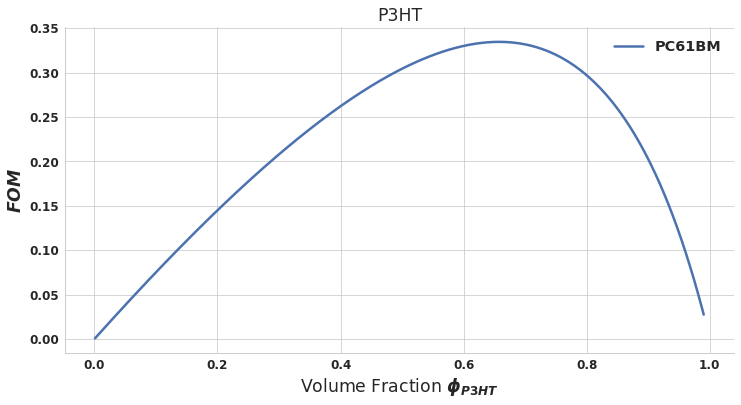

In [154]:
acceptor = df[df['Name']=='PC61BM'].iloc[0]
donor = df[df['Name']=='P3HT'].iloc[0]

x = np.linspace(0.001,0.99,1000)
y = fom(x, donor['Molar_volume'],donor['Hildebrand_sol'],
        acceptor['Molar_volume'],acceptor['Hildebrand_sol'])
plt.plot(x,y,label=acceptor['Name'])
plt.legend(ncol=3,loc='best')
plt.title(donor['Name'])
plt.xlabel('Volume Fraction $\phi_{{ {:s} }}$'.format(donor['Name']))
plt.ylabel('$FOM$')
sns.despine()
plt.show()

# Several donors and acceptors

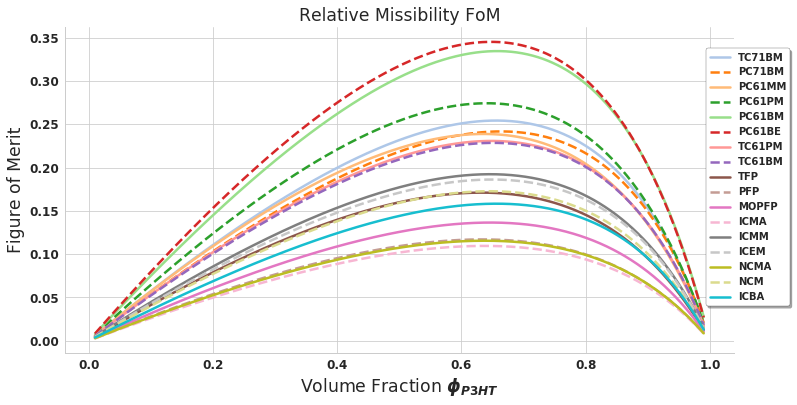

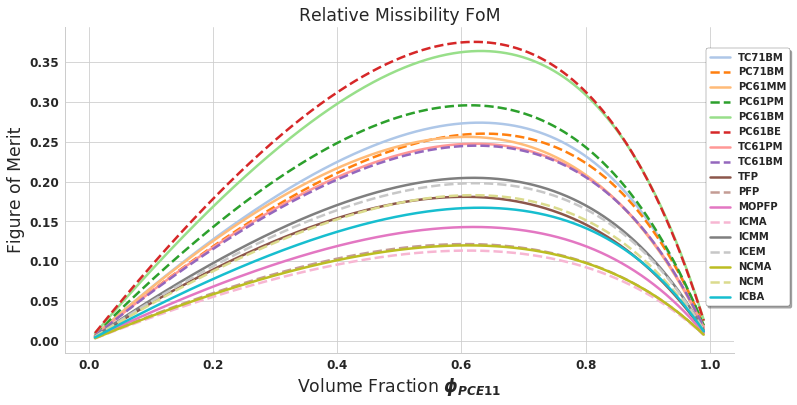

In [155]:
donors_df = df[df['Role']=='Donor']
acceptors_df = df[df['Role']=='Acceptor']
x = np.linspace(0.01,0.99,1000)
for indx1,donor in donors_df.iterrows():
    pal = sns.color_palette("tab20", len(acceptors_df))
    for indx2,acceptor in acceptors_df.iterrows():
        y = fom(x,donor['Molar_volume'],   donor['Hildebrand_sol'],
                acceptor['Molar_volume'],acceptor['Hildebrand_sol'])
        ln='-' if indx2%2==0 else'--'
        plt.plot(x,y,label=acceptor['Name'],c=pal[indx2],linestyle=ln)
        #save_figure('ChiSpinodal_{}_{}.png'.format(acceptor['Name'],donor['Name']))
    plt.xlabel('Volume Fraction $\phi_{{ {:s} }}$'.format(donor['Name']))
    plt.ylabel('Figure of Merit')
    sns.despine()
    legend=plt.legend(ncol=1,loc='best',bbox_to_anchor=(0.95, 0.95),fontsize='x-small',
               fancybox=True,frameon=True,shadow=True,
               facecolor='#FFFFFF',edgecolor='#000000',framealpha=1.0)

    plt.title('Relative Missibility FoM')
    save_figure('FOM_{}'.format(donor['Name']))
    plt.show()